#### Project 3 - Triangular mesh generator

In [2]:
using PyPlot, LinearAlgebra, Delaunator

function tplot(p, t)
    # Plot triangular mesh with nodes `p` and triangles `t`
    tris = convert(Array{Int64}, hcat(t...)')
    tripcolor(first.(p), last.(p), tris .- 1, 0*tris[:,1],
              cmap="Set3", edgecolors="k", linewidth=1)
    axis("equal")
    return
end

# Delaunay triangulation `t` of array of nodes `p`
delaunay(p) = collect.(triangulate(p).triangles)

delaunay (generic function with 1 method)

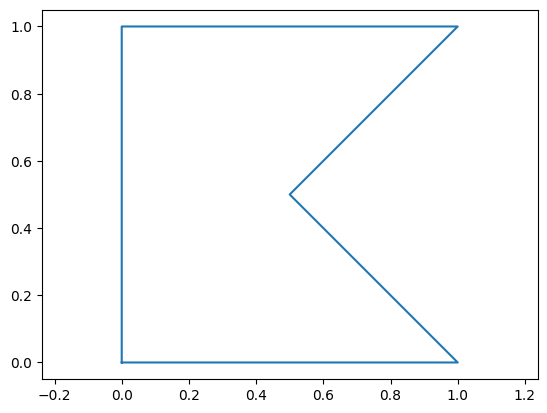

In [3]:
pv = [[0,0], [1,0], [0.5,.5], [1,1], [0,1], [0,0]]
plot(first.(pv), last.(pv))
axis("equal");

#### Problem 1 - Point in polygon

In [10]:
function inpolygon(p,pv)
    x,y = p[1],p[2]
    inside = false
    for i in 1:(length(pv)-1)
        xi = pv[i][1]
        yi = pv[i][2]
        xj = pv[i+1][1]
        yj = pv[i+1][2]
        if (((yi > y)!=(yj > y))&&(x < ((((xj - xi) * (y - yi)) / (yj - yi)) + xi)))
            inside = !inside
        end
    end
    return inside
end
inpolygon([0.8,0.3],pv)

false

#### Problem 2(a) - Triangle area

In [29]:
#given three point, we will calculate the area
tri = [[1,0.5], [2,1], [0,3]]
function tri_area(tri)
    x1 = tri[1][1]
    y1 = tri[1][2]
    x2 = tri[2][1]
    y2 = tri[2][2]
    x3 = tri[3][1]
    y3 = tri[3][2]
    area = (1/2)*abs(x1*(y2-y3)+x2*(y3-y1)+x3*(y1-y2))
    return area
end
tri_area(tri)

1.5

#### Problem 2(b) - Triangle area

In [30]:
function tri_centroid(tri)
    x1 = tri[1][1]
    y1 = tri[1][2]
    x2 = tri[2][1]
    y2 = tri[2][2]
    x3 = tri[3][1]
    y3 = tri[3][2]
    return [(1/3)*(x1+x2+x3),(1/3)*(y1+y2+y3)]
end
tri_centroid(tri)

2-element Vector{Float64}:
 1.0
 1.5

#### Problem 2(c) - Triangle circumcenter

In [31]:
#
function tri_centroid(tri)
    x1 = tri[1][1]
    y1 = tri[1][2]
    x2 = tri[2][1]
    y2 = tri[2][2]
    x3 = tri[3][1]
    y3 = tri[3][2]
    d = 2*(x1*(y2-y3)+x2*(y3-y1)+x3*(y1-y2))
    x = 1/d*((x1^2+y1^2)*(y2 - y3)+(x2^2+y2^2)*(y3-y1)+(x3^2+y3^2)*(y1-y2))
    y = 1/d*((x1^2+y1^2)*(x3 - x2)+(x2^2+y2^2)*(x1-x3)+(x3^2+y3^2)*(x2-x1))
    return [x,y] 
end
tri_centroid(tri)

2-element Vector{Float64}:
 0.9166666666666666
 1.9166666666666665

#### Problem 3 - Mesh generator

In [71]:
using LinearAlgebra

#given two points a and b of coordinate [x1,y1],[x2,y2], we will calculate the y coordinate
#of the given corresponding x on the line segment ab.
function y_coord(a,b,x)
    x1 = a[1]
    y1 = a[2]
    x2 = b[1]
    y2 = b[2]
    y = (x-x1+y1*(x2-x1)/(y2-y1))*((y2-y1)/(x2-x1))
    return y
end
function x_coord(a,b,y)
    x1 = a[1]
    y1 = a[2]
    x2 = b[1]
    y2 = b[2]
    x = (y-y1)*(x2-x1)/(y2-y1)+x1
    return x
end
function cartesion_distance(a,b)
    return sqrt((b[1]-a[1])^2+(b[2]-a[2])^2)
end
#We will first create node points p along each polygon segment and store them in node(it will also include the polygon node), 
#separated by a distance approximately equal to hmax. Return all the node on the line
function equi_node(pv,hmax)
    node = []
    for i in 1:(length(pv)-1)
        if (pv[i+1][1]-pv[i][1] !=0)&(pv[i+1][2]-pv[i][2] != 0)
            dx = hmax*abs(pv[i+1][1]-pv[i][1])/cartesion_distance(pv[i+1],pv[i])
            println("dx : ", dx)
            xarray = collect(pv[i][1]:dx:pv[i+1][1])
            println("the x array is ", xarray)
            yarray = []
            for x in xarray
                push!(yarray,y_coord(pv[i],pv[i+1],x))
            end
            println("the y array is ", yarray)
            if length(xarray) != length(yarray)
                println("ok this is not solving the problem")
            end
            for j in 1:length(xarray)
                push!(node,[xarray[j],yarray[j]])
            end
        elseif ((pv[i+1][1]-pv[i][1] == 0))
            dy = hmax*abs(pv[i+1][2]-pv[i][2])/cartesion_distance(pv[i+1],pv[i])
            println("dy : ", dy)
            yarray = collect(pv[i][2]:dy:pv[i+1][2])
            xarray = []
            if length(xarray) != length(yarray)
                println("ok this is not solving the problem")
            end
            for y in yarray
                push!(xarray,0)
            end
            println("the x array is ", xarray)
            println("the y array is ", yarray)

            for j in 1:length(xarray)
                push!(node,[xarray[j],yarray[j]])
            end
        elseif (pv[i+1][2]-pv[i][2] == 0)
            dx = hmax*abs(pv[i+1][1]-pv[i][1])/cartesion_distance(pv[i+1],pv[i])
            println("dx : ", dx)
            xarray = collect(pv[i][1]:dx:pv[i+1][1])
            println("the x array is ", xarray)
            yarray = []
            for x in xarray
                push!(yarray,0)
            end
            println("the y array is ", yarray)
            if length(xarray) != length(yarray)
                println("ok this is not solving the problem")
            end
            for j in 1:length(xarray)
                push!(node,[xarray[j],yarray[j]])
            end
            
        end
    end
    return node
end

function pmesh(pv,hmax)
    node = [] #We keep track of all the nodes show up
    poly = pv #Store the information about the original polygon
end
pv = [[0,0], [1,0], [0.5,0.5], [1,1], [0,1], [0,0]]

equi_node(pv,0.3)
#x_coord([0.5,0.5],[1,1],0.5)


dx : 0.3
the x array is [0.0, 0.3, 0.6, 0.9]
the y array is Any[0, 0, 0, 0]
dx : 0.21213203435596423
the x array is Float64[]
the y array is Any[]
dx : 0.21213203435596423
the x array is [0.5, 0.7121320343559643, 0.9242640687119285]
the y array is Any[0.5, 0.7121320343559643, 0.9242640687119285]
dx : 0.3
the x array is Float64[]
the y array is Any[]
dy : 0.3
the x array is Any[]
the y array is Float64[]


7-element Vector{Any}:
 [0.0, 0.0]
 [0.3, 0.0]
 [0.6, 0.0]
 [0.9, 0.0]
 [0.5, 0.5]
 [0.7121320343559643, 0.7121320343559643]
 [0.9242640687119285, 0.9242640687119285]